In [49]:
%matplotlib inline
import pandas as pd

In [50]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [51]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

/home/mmoscardini/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,title,year
0,Banquete das Taras,1982
1,Haunting,2018
2,Guilty as Sin,1993
3,WestAcre: The Movie,2007
4,The Solitaire Man,1933


In [52]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

/home/mmoscardini/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [53]:
titles.head()

,title,year
0,Banquete das Taras,1982
1,Haunting,2018
2,Guilty as Sin,1993
3,WestAcre: The Movie,2007
4,The Solitaire Man,1933


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

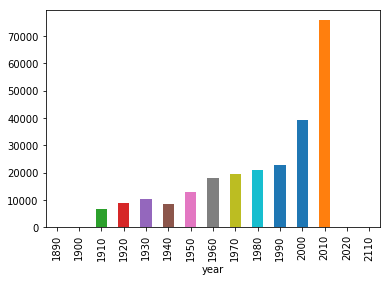

In [54]:
t = titles
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

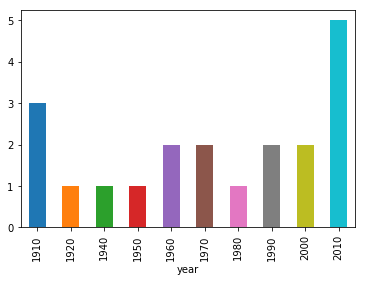

In [55]:
t = titles
t = t[t.title == 'Hamlet']
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [56]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      625
      actress    288
1951  actor      651
      actress    285
1952  actor      613
      actress    304
1953  actor      664
      actress    312
1954  actor      636
      actress    316
1955  actor      648
      actress    285
1956  actor      668
      actress    307
1957  actor      739
      actress    315
1958  actor      715
      actress    301
1959  actor      733
      actress    327
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [70]:
c = cast[(cast.n.notnull()) & (cast.n < 6)]
c = c[c.year // 10 == 195]
c.groupby(['n', 'type']).size()

n    type   
1.0  actor      6692
     actress    3040
2.0  actor      4640
     actress    4635
3.0  actor      5654
     actress    3201
4.0  actor      5663
     actress    2881
5.0  actor      5674
     actress    2592
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [134]:
c = cast
c = c[(c.title == 'The Pink Panther')]
c = c.groupby(['year']).max()
c

,title,name,type,character,n
year,,,,,
1963,The Pink Panther,William Bryant,actress,Waiter,15.0
2006,The Pink Panther,Za Kari A. Asher,actress,Yves Gluant,50.0


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [149]:
c = cast
c = c[c.name == 'Frank Oz'].sort_values('year')
c = c.groupby(['year', 'title']).size()
c = c[c>1]
c

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [155]:
c = cast
c = c[c.name == 'Frank Oz']
c = c.groupby(['character']).size()
c[c>1].sort_values()

character
Grover            2
Bert              3
Fozzie Bear       4
Cookie Monster    5
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64